In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import math

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/Master Thesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [9]:
sample = df_3d

**Elbow Implimentation with Sum of Squared Error**

In [10]:
SSE={}
K = range(1,10)
for k in K :
    SSE[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    for i in range(0,k):
        cluster_datapoints = pd.DataFrame(sample[labels==i],columns=["PC1","PC2","PC3"])
        print(cluster_datapoints.head())
        
        #Mean Value of each dimention of datapoints in this cluster
        cluster_mean = cluster_datapoints.mean(axis=0)
        print("Cluster Mean= "+str(cluster_mean))
        
        for index,row in cluster_datapoints.iterrows():
            a=(row["PC1"]-cluster_mean["PC1"])**2
            b=(row["PC2"]-cluster_mean["PC2"])**2
            c=(row["PC3"]-cluster_mean["PC3"])**2
            err=math.sqrt(a+b+c)
            SSE[k]=SSE[k]+err
            print("a= "+str(SSE[k]))
            #print("//")
        #print(g/len(cluster_datapoints["PC1"]))    
    #print(SSE)

        PC1       PC2       PC3
0 -2.865507  0.302780  0.048490
1 -2.893213 -0.176987 -0.168798
2 -3.055749 -0.168006  0.056542
3 -2.921249 -0.325027  0.009800
4 -2.906751  0.302333  0.153720
Cluster Mean= PC1    1.835569e-16
PC2   -4.400184e-16
PC3   -1.228647e-16
dtype: float64
a= 2.8818667324515452
a= 5.78539923539107
a= 8.846285659385744
a= 11.785577168345984
a= 14.712049229839414
a= 17.316389616969133
a= 20.320186074328518
a= 23.13559322229258
a= 26.24452451411688
a= 29.106166167137175
a= 31.881063229561583
a= 34.680365609806486
a= 37.65503477011136
a= 41.06923359652893
a= 44.12434557937011
a= 47.05207654832493
a= 49.97892230664787
a= 52.82759449500311
a= 55.39943642513012
a= 58.22972611703811
a= 60.78743344417541
a= 63.56306073092167
a= 66.94684665697513
a= 69.45812746882886
a= 72.01632562333451
a= 74.72992832407022
a= 77.39819612856097
a= 80.17393323150507
a= 83.01499335123468
a= 85.83755643016055
a= 88.62048595934893
a= 91.2646847426364
a= 94.21926957429673
a= 97.21468239103645

        PC1       PC2       PC3
0  2.723653 -0.035827  0.646603
1  2.799601  0.346962 -0.044368
2  2.198814 -0.222224  0.164996
3  2.552751 -0.063130  0.277638
4  3.527018  0.622118 -0.369142
Cluster Mean= PC1    2.636109
PC2    0.261685
PC3    0.132769
dtype: float64
a= 62.15266172198179
a= 62.40835512650013
a= 63.06137433892716
a= 63.42666925565886
a= 64.5108943597811
a= 65.21143266703362
a= 65.87443568375548
a= 66.61410337478077
a= 67.4023310990931
a= 68.19966386442356
a= 68.46972088936798
a= 69.16113141515883
a= 69.69239362364678
a= 71.0612585344421
a= 72.53478017654002
a= 72.70852144898697
a= 73.9666754347166
a= 74.23121793918484
a= 74.64919330742929
a= 75.23558076262405
a= 75.70130566447072
a= 76.37880620826641
a= 77.74497233714082
a= 78.32670289399275
a= 79.17275715993117
a= 79.85034902216812
a= 80.43109312712227
a= 80.7526767670362
a= 81.0360696738003
a= 81.55758518242375
a= 81.75643960573775
a= 82.13896020693637
a= 82.65668342289062
a= 83.3523866420007
a= 84.18358508277859
   

a= 13.15149129392467
        PC1       PC2       PC3
0  1.196484  0.789637 -0.475876
1  0.869588  0.389422 -0.138990
2  1.364693  0.625797 -0.480233
3  1.014358  0.174763 -0.442421
4  1.022144  0.362402 -0.021133
Cluster Mean= PC1    0.959325
PC2    0.166507
PC3   -0.323742
dtype: float64
a= 13.835363203115836
a= 14.138475320172319
a= 14.770740600784462
a= 14.901818954045735
a= 15.267733054786033
a= 15.513247211541609
a= 16.13883250092024
a= 16.353645068881047
a= 16.744962766046456
a= 17.437141328546844
a= 17.961128574965418
a= 18.47387132443029
a= 18.761755527446986
a= 19.064705965372568
a= 19.339144818003064
a= 19.813018638195423
a= 20.36086078307804
a= 20.73243098376486
a= 21.298980626910573
a= 21.86879431255449
a= 22.25586634223203
a= 22.87625869435921
a= 23.101184300986034
a= 23.473667641388133
        PC1       PC2       PC3
0  2.723653 -0.035827  0.646603
1  2.198814 -0.222224  0.164996
2  2.552751 -0.063130  0.277638
3  2.523886 -0.240186 -0.285685
4  1.909358  0.156464  0.4192

a= 6.5567698591821095
a= 6.944209947182044
a= 7.519349495748661
a= 8.037781204878113
a= 8.450108422279712
a= 8.657740939537364
a= 9.002135894468074
a= 9.358453776726076
a= 9.55219553714565
a= 9.979189422565915
a= 10.234499736479194
a= 10.548745940222096
a= 10.842281078648673
a= 11.004113558367461
a= 11.11113857478524
a= 11.330131945751727
a= 11.488633700220843
a= 11.561829794481422
        PC1       PC2       PC3
0  2.723653 -0.035827  0.646603
1  2.198814 -0.222224  0.164996
2  2.552751 -0.063130  0.277638
3  2.523886 -0.240186 -0.285685
4  1.909358  0.156464  0.419237
Cluster Mean= PC1    2.332270
PC2    0.056687
PC3    0.313775
dtype: float64
a= 12.083858676240766
a= 12.426987565372537
a= 12.680510744808753
a= 13.376357652645128
a= 13.823495345113175
a= 14.315042343464768
a= 14.527218634779178
a= 14.842109210675344
a= 15.073968571461974
a= 15.490831819139421
a= 15.775489291533706
a= 16.10033802491087
a= 16.42038594948829
a= 16.83312107495112
a= 17.046290442120235
a= 17.3482961306842

**Ploting Elbow**

In [11]:
SSE_array=[]
slope=[]
for key,value in SSE.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
slope

[308.9217270410685, 136.2594239818455, 93.77541224052884, 84.18358508277859, 72.40917282131636, 65.43869571755404, 58.79264548803037, 54.8308767960283, 52.78864769617546]


[[2, -172.662303059223],
 [3, -42.48401174131665],
 [4, -9.591827157750245],
 [5, -11.774412261462231],
 [6, -6.97047710376232],
 [7, -6.646050229523674],
 [8, -3.9617686920020674],
 [9, -2.0422290998528396]]

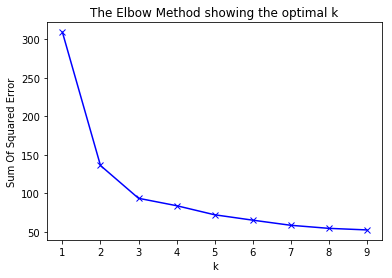

In [12]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Sum Of Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [13]:
slope

[[2, -172.662303059223],
 [3, -42.48401174131665],
 [4, -9.591827157750245],
 [5, -11.774412261462231],
 [6, -6.97047710376232],
 [7, -6.646050229523674],
 [8, -3.9617686920020674],
 [9, -2.0422290998528396]]

In [14]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
